#Limpieza de datos de Netflix

Realizar una limpieza de los datos y análisis exploratorio de datos para determinar las características de las películas que tienen mayor probabilidad a ser mejor puntuadas.

NetflixOriginals.csv NetflixOriginals.csv 23 de June de 2023, 12:51

#En el siguiente dataset, encontrarán datos de películas de Netflix:

Titulo,
Género,
Fecha de estreno,
Duración en minutos,
Puntuación IMDB,
Idioma.

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/mineria/NetflixOriginals.csv"
data = pd.read_csv(ruta, encoding ="latin1")

Mounted at /gdrive


In [ ]:
data.info

#Limpiamos los datos

In [4]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


#Columnas irrelevantes

In [3]:
cols_cat = ['Title', 'Genre', 'Premiere', 'Language']

for col in cols_cat:
  print(f'Columna: {col}: {data[col].nunique()} subniveles' )

NameError: ignored

In [6]:
data.describe()

,Runtime,IMDB Score
count,579.000000,579.000000
mean,93.497409,6.274784
std,27.846426,0.976765
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,107.500000,7.000000
max,209.000000,9.000000


In [7]:
#Analisis de filas repetidas

print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (579, 6)
Tamaño del set después de eliminar las filas repetidas: (579, 6)


#Variables numericas

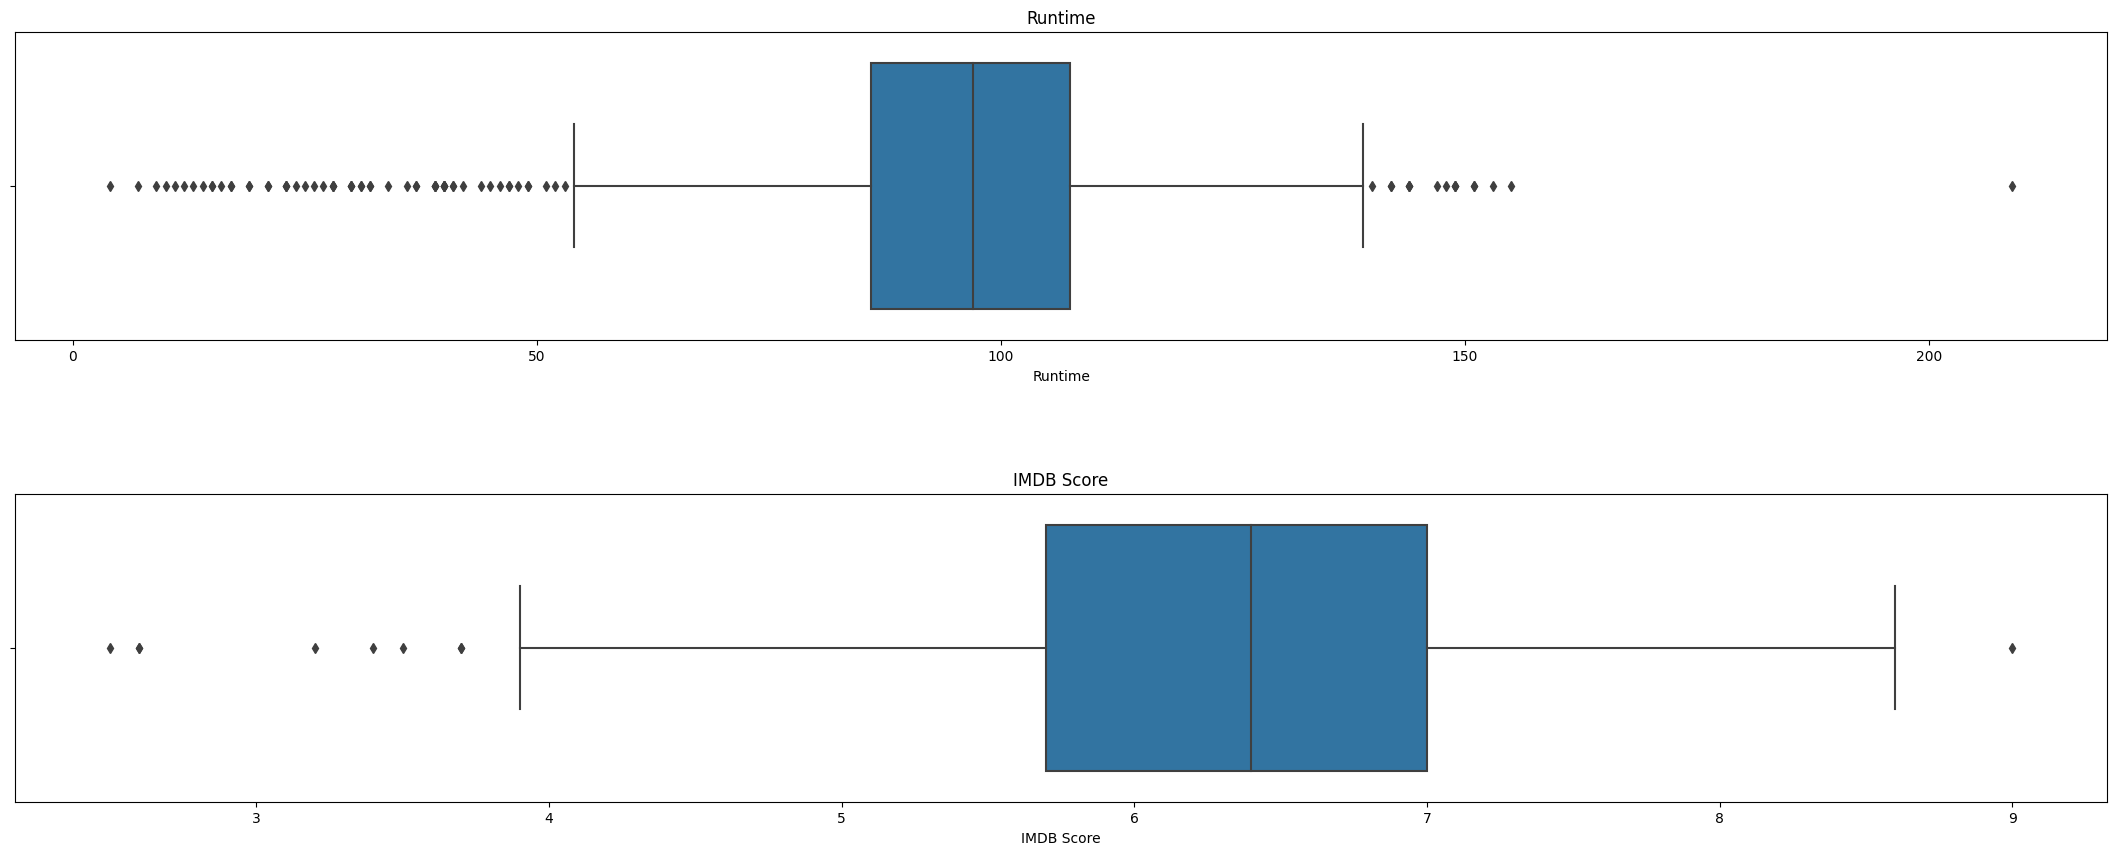

In [10]:
cols_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows = 2, ncols=1, figsize=(27,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data , ax=ax[i])
  ax[i].set_title(col)

In [11]:
data.shape

(579, 6)

#Conclusión
Despues de realizar una limpieza en los datos eliminando columnas vacias hemos logrado obtener 579 datos y 6 columas, donde originalmente se tenian 585 registros eliminando: 6 datos.

In [14]:
ruta = "/gdrive/MyDrive/mineria/NetflixOriginals_cleaned.csv"
data.to_csv(ruta, index=False)